In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
# 학습 데이터 불러오기
df_org = pd.read_csv("train.csv", encoding="cp949")

In [ ]:
df_org.head()

# 데이터 분석

In [3]:
# 우범여부 비율 확인

data_array = df_org['우범여부'].groupby(df_org['특송업체부호'])
#data_array.mean()
arr_s = pd.Series(data_array.mean())
arr_s.sort_values(ascending=False)

특송업체부호
5FDIRV    0.714286
A41WVG    0.709677
ZVCGS6    0.688312
47QGIA    0.666667
5HIQAV    0.666667
            ...   
24BG4R    0.363937
O04TIW    0.346300
TQ18AK    0.343943
PR5UFJ    0.275348
PAVJZL    0.270908
Name: 우범여부, Length: 80, dtype: float64

In [4]:
data_array = df_org['우범여부'].groupby(df_org['통관지세관부호'])
#data_array.mean()
arr_s = pd.Series(data_array.mean())
arr_s.sort_values(ascending=False)

통관지세관부호
102    0.711111
101    0.705882
150    0.685714
60     0.666667
100    0.659574
131    0.648276
154    0.642857
151    0.637795
110    0.631579
121    0.627737
21     0.626087
122    0.625000
81     0.619048
120    0.616438
56     0.611765
17     0.608696
50     0.602041
130    0.602041
39     0.595238
53     0.595092
82     0.581081
140    0.577540
90     0.573770
152    0.571429
23     0.568627
14     0.556962
80     0.553691
62     0.549356
41     0.534884
153    0.493827
71     0.482759
12     0.478469
70     0.458333
33     0.455975
13     0.396401
16     0.326393
30     0.275249
20     0.241217
40     0.178019
10     0.117665
Name: 우범여부, dtype: float64

In [5]:
data_array = df_org['우범여부'].groupby(df_org['운송수단유형코드'])
#data_array.mean()
arr_s = pd.Series(data_array.mean())
arr_s.sort_values(ascending=False)

운송수단유형코드
90    0.643750
20    0.629213
30    0.494881
50    0.479540
40    0.234374
10    0.193899
Name: 우범여부, dtype: float64

c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda\envs\tenf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  fon

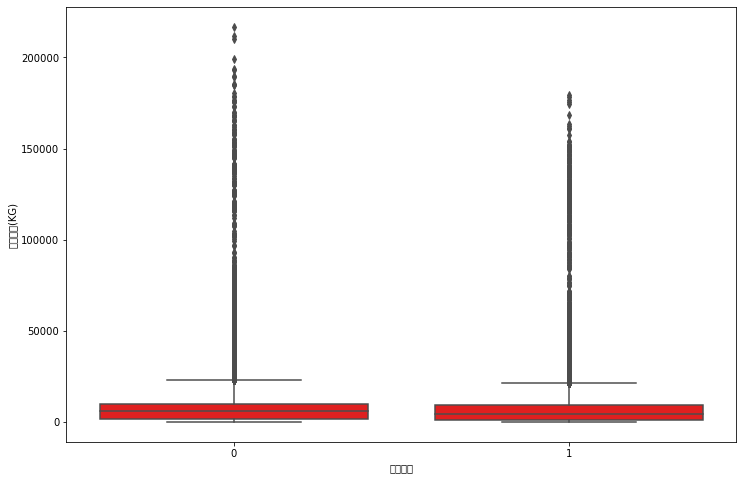

In [6]:
plt.figure(figsize=(12,8)) # 신고중량
sns.boxplot(x = '우범여부',y = '신고중량(KG)', color = 'red', data=df_org)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

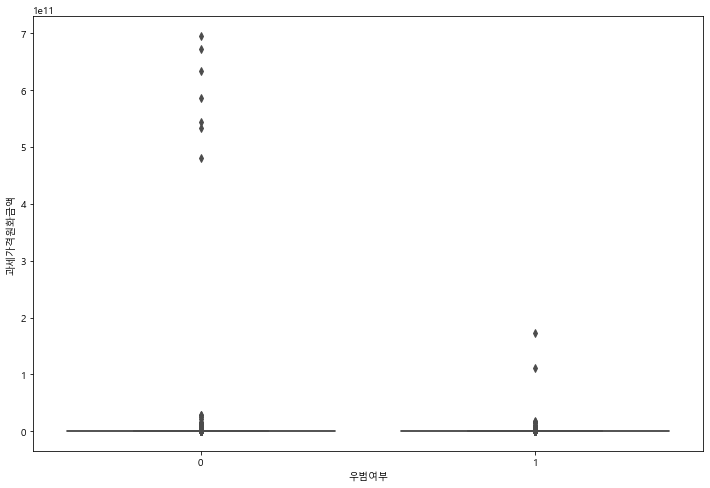

In [7]:
plt.figure(figsize=(12,8)) # 과세가격원화금액
sns.boxplot(x = '우범여부',y = '과세가격원화금액', color = 'red', data=df_org)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

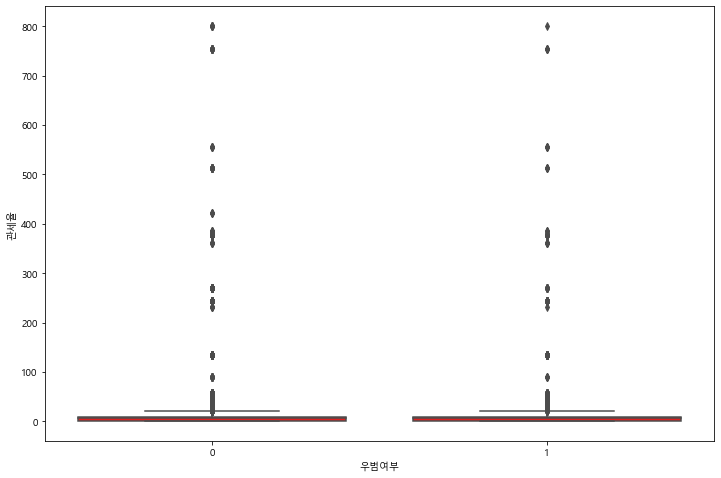

In [8]:
plt.figure(figsize=(12,8)) # 과세가격원화금액
sns.boxplot(x = '우범여부',y = '관세율', color = 'red', data=df_org)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

# 범주형 변수 수치화

In [ ]:
# Nan 값 처리
df_org = df_org.fillna('없음')

In [ ]:
## 범주형 변수를 수치형 변수로 바꾸기 위한 작업 
# 범주형 변수의 고유값 별 개수를 df_z로 따로 저장
df_z = df_org['특송업체부호'].value_counts(normalize=True).rename_axis('unique').reset_index(name='counts')
# df_z에서 각각의 cloumns을 분리해서 별도로 저장 
df_un = df_z['unique']
df_co = df_z['counts'].round(decimals=6)
du = df_un.tolist()
dc = df_co.tolist()
# 본래 데이터에 새롭게 추가
for i in range(df_z.shape[0]):
    df_org.loc[df_org['특송업체부호'] == du[i] , '특송업체부호비율'] = dc[i]
# 수치형 변수 타입 변경 
df_org['특송업체부호비율'] = df_org['특송업체부호비율'].apply(lambda x: np.log1p(x))

In [ ]:
df_z = df_org['통관지세관부호'].value_counts(normalize=True).rename_axis('unique').reset_index(name='counts')
df_un = df_z['unique']
df_co = df_z['counts'].round(decimals=6)
du = df_un.tolist()
dc = df_co.tolist()
for i in range(df_z.shape[0]):
    df_org.loc[df_org['통관지세관부호'] == du[i] , '통관지세관부호비율'] = dc[i]
df_org['통관지세관부호비율'] = df_org['통관지세관부호비율'].apply(lambda x: np.log1p(x))

In [ ]:
df_z = df_org['해외거래처부호'].value_counts(normalize=True).rename_axis('unique').reset_index(name='counts')
df_un = df_z['unique']
df_co = df_z['counts'].round(decimals=6)
du = df_un.tolist()
dc = df_co.tolist()
for i in range(df_z.shape[0]):
    df_org.loc[df_org['해외거래처부호'] == du[i] , '해외거래처부호비율'] = dc[i]
df_org['해외거래처부호비율'] = df_org['해외거래처부호비율'].apply(lambda x: np.log1p(x))

In [ ]:
df_z = df_org['운송수단유형코드'].value_counts(normalize=True).rename_axis('unique').reset_index(name='counts')
df_un = df_z['unique']
df_co = df_z['counts'].round(decimals=6)
du = df_un.tolist()
dc = df_co.tolist()
for i in range(df_z.shape[0]):
    df_org.loc[df_org['운송수단유형코드'] == du[i] , '운송수단유형코드비율'] = dc[i]
df_org['운송수단유형코드비율'] = df_org['운송수단유형코드비율'].apply(lambda x: np.log1p(x))

In [ ]:
#추가된 수치형 변수 확인 
df_org.head(5)

# 변수 Drop

In [ ]:
# 필요없다고 생각하는 column 삭제
del df_org['통관지세관부호']
del df_org['특송업체부호']
del df_org['해외거래처부호']
del df_org['운송수단유형코드']
del df_org['신고일자']
del df_org['검사결과코드']
del df_org['핵심적발']
del df_org['신고인부호']
del df_org['신고번호']
del df_org['원산지국가코드']
del df_org['관세율']

In [ ]:
#삭제후 데이터셋의 column 확인 
df_org.columns

In [ ]:
# 범주형 변수 지정
discrete_columns = ['수입자부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '관세율구분코드']

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org[var] = df_org[var].astype(str)

# 레이블 인코딩

In [ ]:
# 범주형 변수 전처리 1단계: label encoding --> 각 범주형 변수가 갖는 클래스에 고유의 식별번호 부여
# 예) 수입자 상호: AAABB -> 1, 가나다라 -> 2, ...

label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_org[var].unique())}
    print(label_encoding_ref[var])
    df_org[var] = [label_encoding_ref[var][x] for x in df_org[var]]

In [ ]:
df_org.head()

In [ ]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '특송업체부호비율', 
                   '통관지세관부호비율', '해외거래처부호비율', '운송수단유형코드비율']

In [ ]:
# 수치형 변수, 범주형 변수 분리
numeric = df_org[numeric_columns]

In [ ]:
# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

numeric['신고중량(KG)'] = rob_scaler.fit_transform(numeric['신고중량(KG)'].values.reshape(-1,1))
numeric['과세가격원화금액'] = rob_scaler.fit_transform(numeric['과세가격원화금액'].values.reshape(-1,1))
numeric['특송업체부호비율'] = rob_scaler.fit_transform(numeric['특송업체부호비율'].values.reshape(-1,1))
numeric['통관지세관부호비율'] = rob_scaler.fit_transform(numeric['통관지세관부호비율'].values.reshape(-1,1))
numeric['해외거래처부호비율'] = rob_scaler.fit_transform(numeric['해외거래처부호비율'].values.reshape(-1,1))
numeric['운송수단유형코드비율'] = rob_scaler.fit_transform(numeric['운송수단유형코드비율'].values.reshape(-1,1))

In [ ]:
df_org.head()

# 수치형 PCA

In [ ]:
from sklearn import decomposition
#주성분 갯수 5개  생성 
pca = decomposition.PCA(n_components=5).fit(numeric)

reduced_numeric = pca.transform(numeric)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#수치형 변수에 대해서 PCA 계산
df_org['신고중량(KG)']  = reduced_numeric[:, 0]
df_org['과세가격원화금액']  = reduced_numeric[:, 1]
df_org['특송업체부호비율']  = reduced_numeric[:, 2]
df_org['통관지세관부호비율']  = reduced_numeric[:, 2]
df_org['해외거래처부호비율']  = reduced_numeric[:, 3]
df_org['운송수단유형코드비율']  = reduced_numeric[:, 4]

# 데이터셋 확인

In [ ]:
# PCA 처리 제대로 되었는지 확인
df_org.head(5)

# 훈련/시험 데이터셋 분할

In [ ]:
# 데이터 셋 라벨 분리
y = df_org['우범여부']
x = df_org.drop(columns = '우범여부')
type(x), type(y)

In [ ]:
# train, test data split
df_org_train, df_org_test, org_train_y, org_test_y = train_test_split(x,y, test_size = 0.3, stratify = y, random_state =3)

# 원핫인코딩 데이터셋 프로세스

In [ ]:
# train, test data 원핫인코딩 전 마킹
df_org_train['label'] = 'train'
df_org_test['label'] = 'test'
# train, test data 결합
concat_df = pd.concat([df_org_train,df_org_test])

# dummies함수를 통해 범주형 변수 원핫인코딩
df_org_trains = pd.get_dummies(concat_df, columns = discrete_columns)

# 마킹값을 통해 train, test data 복구
df_train =  df_org_trains[df_org_trains['label'] == 'train']
df_test =  df_org_trains[df_org_trains['label'] == 'test']

In [ ]:
# 마킹 라벨 제거
df_train = df_train.drop('label', axis=1)
df_test = df_test.drop('label', axis=1)

In [ ]:
# 데이터 사이즈 확인
print(df_train.shape, df_test.shape)
print(org_train_y.shape, org_test_y.shape)

# Imbalanced Sampling
# * SMOTE *

In [ ]:
from imblearn.over_sampling import *

In [ ]:
# SMOTE를 진행할 train data 확인
df_train.info()

In [ ]:
# SMOTE를 통해 train data 클래스 불균형 해결
smote = SMOTE(random_state=11, sampling_strategy='all')
df_train_over_x, df_train_over_y = smote.fit_resample(df_train, org_train_y)
df_train_over_x.info(), df_train_over_y

# 모델 생성 / 학습 / 평가

In [ ]:
# XGBoost 모델 생성
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# xgb 모델 생성
xgb_clf = XGBClassifier(n_estimators=50, max_depth=4, n_jobs=-1, reg_lambda=1)
# evaluation Set 생성
eval_set = [(df_train_over_x, df_train_over_y), (df_test, org_test_y)]
# 모델 학습
xgb_clf.fit(df_train_over_x, df_train_over_y, eval_metric=["logloss"],
            eval_set=eval_set, verbose=True)

In [ ]:
# 모델 성능 시각화

from matplotlib import pyplot
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')

In [ ]:
# evaluate xgboost model
print("------Evaluating xgboost model------")
# Predict
test_pred = xgb_clf.predict_proba(df_test)[:,1]
# Calculate auc
xgb_auc = roc_auc_score(org_test_y, test_pred)
print(xgb_auc)

In [ ]:
# inspection 검사 함수
def inspection_performance(predicted_fraud, test_fraud):
        
    Inspect_Rate=[]
    Precision=[]
    Recall=[]
    
    for i in range(0,101,1):
        
        threshold = np.percentile(predicted_fraud, i)
        # Precision = number of frauds / number of inspection
        precision = np.mean(test_fraud[predicted_fraud >= threshold])
        # Recall = number of inspected frauds / number of frauds
        recall = sum(test_fraud[predicted_fraud >= threshold])/sum(test_fraud)
        # Save values
        Inspect_Rate.append(100-i)
        Precision.append(precision)
        Recall.append(recall)
        
    
    compiled_conf_matrix = pd.DataFrame({
        'Inspect_Rate':Inspect_Rate,
        'Precision':Precision,
        'Recall':Recall
    })

    return compiled_conf_matrix

In [ ]:
# inspection 계산
basic_performance = inspection_performance(test_pred, org_test_y.astype(float))

In [ ]:
# 검사율 1~10% 지정 시 Precision 및 Recall 분석
# Precision (적중률) = (검사선별된 우범건수)/(검사선별 건수)
# Recall (적발률) = (검사선별된 우범건수) / (전체 우범건수)
basic_performance.iloc[range(99,89,-1),:]

In [ ]:
# 계산한 결과 시각화
data = pd.melt(basic_performance, 
               id_vars = ['Inspect_Rate'],
               value_vars = ['Recall','Precision'])

sns.relplot(data=data,
            kind='line',
            x="Inspect_Rate", 
            y="value", 
            hue='variable',
            col="variable")

In [ ]:
# 모델에 기여도가 높은 변수 시각화
from xgboost import plot_importance
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,10)
plot_importance(xgb_clf, max_num_features=30)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# test 예측 label 값 
y_preds = xgb_clf.predict(df_test)

In [ ]:
print("accuracy score for trained data",accuracy_score(df_train_over_y,xgb_clf.predict(df_train_over_x)))
print("accuracy score is",accuracy_score(org_test_y,y_preds))
print("Confusion matrix",confusion_matrix(org_test_y,y_preds))
print("Report",classification_report(org_test_y,y_preds))

# Submission 값 추출

### Submission 용 Test 데이터셋 추출

In [ ]:
# df_org를 불러올 때 기존 train + test 셋을 합쳐서 불러옴
# 불러온 후 기존에 있던 데이터 전처리 모두 시행

In [ ]:
# Train + Test의 데이터를 전부 One Hot encoding 시행
df_onehot = pd.get_dummies(df_org, columns = discrete_columns)
df_onehot.tail()

In [ ]:
# 인코딩한 데이터프레임을 분리하여 'test' 데이터프레임은 유지
# 분리한 이후 남은 train 셋은 기존에 인코딩 프로세스로 진행

test = df_onehot.iloc[76837:, :]
test.shape

In [ ]:
# 분리한 테스트셋의 레이블 삭제

test_x = real_test.drop(columns='우범여부')

In [ ]:
# 학습시킨 기존 모델에 'test' 데이터프레임 대상으로 predict 시행

y_preds = xgb_clf.predict(test_x)
y_preds

In [ ]:
# 예측결과 데이터프레임 변환 

pred_df = pd.DataFrame(y_preds, columns=['우범여부'])
pred_df

In [ ]:
# 예측결과 데이터프레임 csv파일 변환

pred_df.to_csv('C:\\Users\\CEO\\result.csv', index = None)